# Basic statistics on Discrete Event Simulation (DES) systems:

## Random sampling:

Let's generate N observations of an univariate variable following a normal distribution with mean $\mu$ and standard deviation $\sigma$:

In [3]:
import numpy as np
N = 1000
mu = 0.6
sigma = 0.1
x = np.random.normal(mu, sigma, N)

Plot the histogram with nbins bins: 

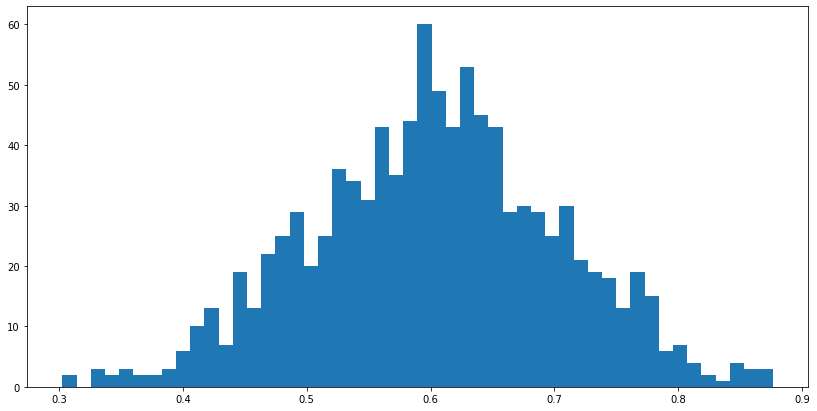

In [4]:
import matplotlib.pyplot as plt

nbins = 50
fig = plt.figure(figsize=(14,7))
plt.hist(x,50)
plt.show()

Random generation of inter-arrival times and service times:

Consider a system in which parts arrive to a robotic station with an uniform probability distribution with a range from 1 to 3 minutes $U(1,3)$. The service times of the robotic station follows a gaussian distribution with mean 1.3 minutes and a standard deviation of 0.6 minutes. To generate a random sample of $N=200$ inter-arrival times and service times we proceed as follows: 


In [5]:
N = 200
inter_arrivals = np.random.randint(low=1,high=4,size=N)
print('Inter arrivals {}'.format(inter_arrivals))
service_times = x = np.random.normal(1.3, 0.3, N)
print('service times {}'.format(service_times))

Inter arrivals [3 1 2 3 1 2 1 1 1 2 2 3 2 1 1 1 3 2 1 3 1 1 2 3 3 1 1 2 3 2 3 3 3 3 2 2 3
 1 3 2 2 2 2 3 1 3 2 2 2 3 2 2 3 1 3 3 2 2 1 3 2 3 3 1 2 1 2 1 2 2 3 1 1 3
 2 1 3 2 2 1 3 3 1 2 3 1 1 1 1 1 1 2 3 1 3 3 2 2 1 2 2 3 2 1 2 2 1 2 2 3 1
 3 1 2 2 3 2 1 1 3 1 3 3 1 1 1 2 3 1 1 3 3 3 3 2 2 1 2 3 3 2 1 3 1 3 1 2 3
 1 2 3 2 2 1 2 1 2 2 1 3 1 3 2 3 1 3 1 1 1 3 2 3 3 1 1 1 1 1 2 2 1 3 1 1 3
 2 3 3 2 3 2 2 3 2 2 3 2 2 3 3]
service times [1.97252912 1.29067656 1.0481423  1.50155936 1.82638752 1.294295
 1.16261534 1.36393044 1.16389882 0.9796369  1.48786783 1.30923671
 1.32290929 1.3117716  1.47247992 1.17775891 1.28586068 1.24830779
 1.38772678 1.59961947 1.57261067 1.67753179 0.70891625 1.16573488
 1.62248777 0.88337011 0.91985541 1.72050092 1.38263357 1.01527459
 1.11566938 1.17856877 1.2548444  1.76230152 1.66528835 1.62191075
 1.37890743 1.5499767  1.70606006 1.13018239 1.31518917 1.05145312
 1.4279743  1.25559854 1.39781917 1.19865527 0.65635458 1.47970145
 1.27122064 0.94294446 1.06723

## Hypothesis testing: t-test

# Hypothesis testing

Consider a sample of $n=25$ simulations of a DES system in which each simulation provides an estimation of the queue length of a machine. The values are the following: 

In [6]:
x_DES = [ 1.54805813,  1.00602165,  1.37433824,  1.79220994,  0.93106753,
        1.20733477,  0.51645397,  1.81174653,  1.17998772,  1.46656456,
        0.6901881 , -0.07863154,  1.73071763,  0.53812963,  1.87345268,
        0.45561314,  1.4413871 ,  1.55092039,  0.81818829,  1.28637081,
        1.05006276,  1.34923019,  1.16052882,  1.49266933,  2.03781074]

The sample mean is 

In [7]:
import numpy as np
np.mean(x_DES)

1.2092168444

Test the hypothesis that the average queue length of the system is $\mu_0 = 1.2$

In [8]:
# Standardized Test Statistic
NSIMUL = len(x_DES)
sample_mean = np.mean(x_DES) # sample mean
sample_std = np.std(x_DES) # sample standard deviation
sem = sample_std/np.sqrt(NSIMUL) #standard error of the mean

print('Sample mean = {}, sample std = {} and s.e.m = {}'.format(sample_mean,sample_std,sem))

Sample mean = 1.2092168444, sample std = 0.5025452804543918 and s.e.m = 0.10050905609087837


Get the observed and critical t-statistic values at the $95\%$ significance level ($\alpha= 0.05$):

In order to get the critical t-value 

$t_{\alpha/2,\text{df}}$

you need the Percent point function (inverse of cdf — percentiles): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [31]:
from scipy.stats import t
mu_0 = 1.2
tstar = np.abs((sample_mean-mu_0)/sem)
t = t.ppf(0.975,NSIMUL-1)

The condifence interval for the sample estimation of the sample mean at the $95\%$ significance level ($\alpha= 0.05$) is given by:


$[\mu_{sample} - t_{\alpha/2,\text{df}} \frac{\sigma_{sample}}{\sqrt{N}} , \mu_{sample} + t_{\alpha/2,\text{df}} \frac{\sigma_{sample}}{\sqrt{N}} ]$


Three equivalent but different ways to check the hypothesis:

1. if $\mu_0$ is included in the confidence interval the null hypothesis can not be rejected


In [32]:
print('Conficende Internval = [{},{}]'.format(sample_mean - t*sem,sample_mean + t*sem))
(mu_0 > sample_mean - t*sem) & (mu_0 < sample_mean + t*sem)

Conficende Internval = [1.001776348103446,1.416657340696554]


True

2. If $|t^*| < t$ there is not enough evidence to reject the null hypothesis that $\mu_{sample} = \mu_0$

In [33]:
np.abs(tstar) < t

True

3. Obtain the proabability of a Type I error ($\alpha$) of erroneosuly rejecting a correct null hypothesis. Null hypothesis can be rejected when the p-value is lower than 0.05:

$\alpha$ = Prob(type I error) 

In [34]:
from scipy.stats import t
p = 2*(1-t.cdf(tstar,NSIMUL-1))  

print('p-value = {}'.format(p))

p-value = 0.9276962327546747


If $p<0.05$, we reject the null hypothesis that the machine has a mean queue length of $\mu_0$

## Power Analysis:

Let's consider that there is no sufficient statistical evidence to reject the null hypothesis. Then we should determine the probability of a type II error, that is when the null hypothesis is not true but we failed to reject it due to limitations in the sample size or to large variability in the sample. 

Then we define 

$\beta$ = Prob(Type II error)

We need to specify the standardized effect size that we want to detect, i.e., the normalized deviations from the sample mean:

$\delta = \frac{\mu_{sample} - \mu_1}{\sigma_{sample}/\sqrt{n}}$

Imageine that we want to detect deviations of 0.1 from the sample mean, then the effect size would be

In [18]:
effect_size = 0.1/sem
print('effect size = {}'.format(effect_size))

effect size = 0.9949352216538767


In [19]:
from statsmodels.stats.power import ttest_power, tt_ind_solve_power

n = tt_ind_solve_power(effect_size=0.1,alpha=0.05,power=0.8,ratio=1.0, alternative='two-sided')
power = tt_ind_solve_power(effect_size=0.1,nobs1= NSIMUL,alpha=0.05,ratio=1.0, alternative='two-sided')

print('Number of simulations needed: {}'.format(n))
print('Statistical power achieved with current simulations: {}'.format(power))
print('Probability of type II error: {}'.format(1-power))

Number of simulations needed: 1570.7330663315456
Statistical power achieved with current simulations: 0.06386694516248347
Probability of type II error: 0.9361330548375165


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
